# Описание проекта

In [84]:
import pandas as pd
import matplotlib.pyplot as plt

# Шаг 1. Открою файл с данными и изучу общую информацию.

In [2]:
data = pd.read_csv('https://code.s3.yandex.net/datasets/logs_exp.csv',sep = '\t')

In [3]:
display(data)
data.info()

,EventName,DeviceIDHash,EventTimestamp,ExpId
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248
...,...,...,...,...
244121,MainScreenAppear,4599628364049201812,1565212345,247
244122,MainScreenAppear,5849806612437486590,1565212439,246
244123,MainScreenAppear,5746969938801999050,1565212483,246
244124,MainScreenAppear,5746969938801999050,1565212498,246


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   EventName       244126 non-null  object
 1   DeviceIDHash    244126 non-null  int64 
 2   EventTimestamp  244126 non-null  int64 
 3   ExpId           244126 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 7.5+ MB


Пропусков в данных нет - уже хорошо.

# Шаг 2. Подготовлю данные к работе.

Задачи:

•Замените названия столбцов на удобные для вас

•Проверьте пропуски и типы данных. Откорректируйте, если нужно

•Добавьте столбец даты и времени, а также отдельный столбец дат

In [7]:
# Приведу timestamp к datetime и изменю название столбцов.
data.columns = ['event','user_id','dt','group']
data['dt'] = pd.to_datetime(data['dt'],unit='s')
display(data.head())
data.info()

ValueError: ignored

In [5]:
# добавлю новый столбец с датой
data['date'] = data['dt'].dt.date
display(data)

,event,user_id,dt,group,date
0,MainScreenAppear,4575588528974610257,2019-07-25 04:43:36,246,2019-07-25
1,MainScreenAppear,7416695313311560658,2019-07-25 11:11:42,246,2019-07-25
2,PaymentScreenSuccessful,3518123091307005509,2019-07-25 11:28:47,248,2019-07-25
3,CartScreenAppear,3518123091307005509,2019-07-25 11:28:47,248,2019-07-25
4,PaymentScreenSuccessful,6217807653094995999,2019-07-25 11:48:42,248,2019-07-25
...,...,...,...,...,...
244121,MainScreenAppear,4599628364049201812,2019-08-07 21:12:25,247,2019-08-07
244122,MainScreenAppear,5849806612437486590,2019-08-07 21:13:59,246,2019-08-07
244123,MainScreenAppear,5746969938801999050,2019-08-07 21:14:43,246,2019-08-07
244124,MainScreenAppear,5746969938801999050,2019-08-07 21:14:58,246,2019-08-07


In [6]:
# проверю на дубликаты
display('Всего дубликатов найдено:',data.duplicated().sum())
# очищу от дубликатов
data = data.drop_duplicates(ignore_index = True)
display(data)

'Всего дубликатов найдено:'

413

,event,user_id,dt,group,date
0,MainScreenAppear,4575588528974610257,2019-07-25 04:43:36,246,2019-07-25
1,MainScreenAppear,7416695313311560658,2019-07-25 11:11:42,246,2019-07-25
2,PaymentScreenSuccessful,3518123091307005509,2019-07-25 11:28:47,248,2019-07-25
3,CartScreenAppear,3518123091307005509,2019-07-25 11:28:47,248,2019-07-25
4,PaymentScreenSuccessful,6217807653094995999,2019-07-25 11:48:42,248,2019-07-25
...,...,...,...,...,...
243708,MainScreenAppear,4599628364049201812,2019-08-07 21:12:25,247,2019-08-07
243709,MainScreenAppear,5849806612437486590,2019-08-07 21:13:59,246,2019-08-07
243710,MainScreenAppear,5746969938801999050,2019-08-07 21:14:43,246,2019-08-07
243711,MainScreenAppear,5746969938801999050,2019-08-07 21:14:58,246,2019-08-07


Пропусков нет,столбцы приведены к удобным названиям,с типом данных все хорошо,можно идти дальше.

# Шаг 3. Изучите и проверьте данные

Задача:

•Сколько всего событий в логе?

•Сколько всего пользователей в логе?

•Сколько в среднем событий приходится на пользователя?

•Данными за какой период вы располагаете? Найдите максимальную и минимальную дату. Постройте гистограмму по дате и времени. Можно ли быть уверенным, что у вас одинаково полные данные за весь период? Технически в логи новых дней по некоторым пользователям могут «доезжать» события из прошлого — это может «перекашивать данные». Определите, с какого момента данные полные и отбросьте более старые. Данными за какой период времени вы располагаете на самом деле?

•Много ли событий и пользователей вы потеряли, отбросив старые данные?

•Проверьте, что у вас есть пользователи из всех трёх экспериментальных групп.


In [9]:
# Проанализирую события в логах
display(data['event'].unique())

array(['MainScreenAppear', 'PaymentScreenSuccessful', 'CartScreenAppear',
       'OffersScreenAppear', 'Tutorial'], dtype=object)

Имеем всего 5 событий. Скорее всего,их порядок таков: Туториал,появление главного экрана,показ предложений,экран ввода карты и экран успешной оплаты. Всего у нас 243713 строки с событиями.

In [15]:
print('Всего у нас ',data['user_id'].nunique(),' уникальных пользователей.')

Всего у нас  7551  уникальных пользователей.


In [16]:
display(data['group'].unique())

array([246, 248, 247])

В тесте участвуют три группы.

In [42]:
print('В среднем на пользователия приходится ',
      round(data.groupby(by = 'user_id').agg({'event':'count'}).mean()[0],2),
      ' событий')

В среднем на пользователия приходится  32.28  событий


In [52]:
print('\n Max дата: ',
      max(data['date']),
      '\n','Min дата: ',
      min(data['date']),
      '\n Всего дней:',
      abs(max(data['date']) -min(data['date']) ).days
      )


 Max дата:  2019-08-07 
 Min дата:  2019-07-25 
 Всего дней: 13


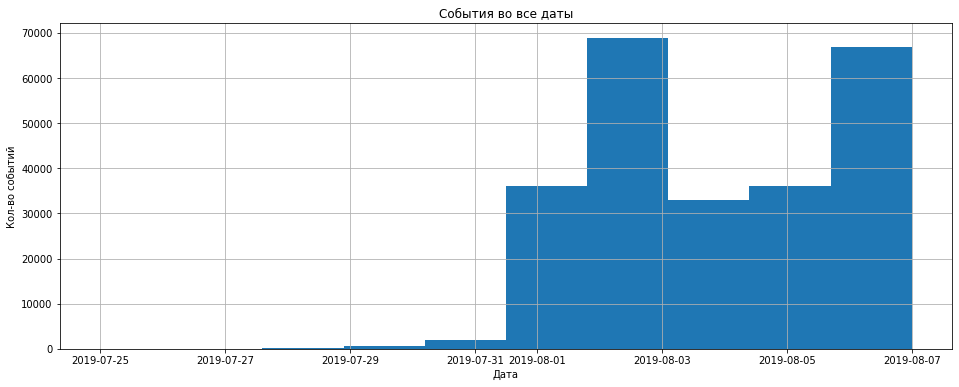

In [100]:
data['date'].hist(figsize=(16, 6));
plt.xlabel('Дата')
plt.ylabel('Кол-во событий')
plt.title('События во все даты');

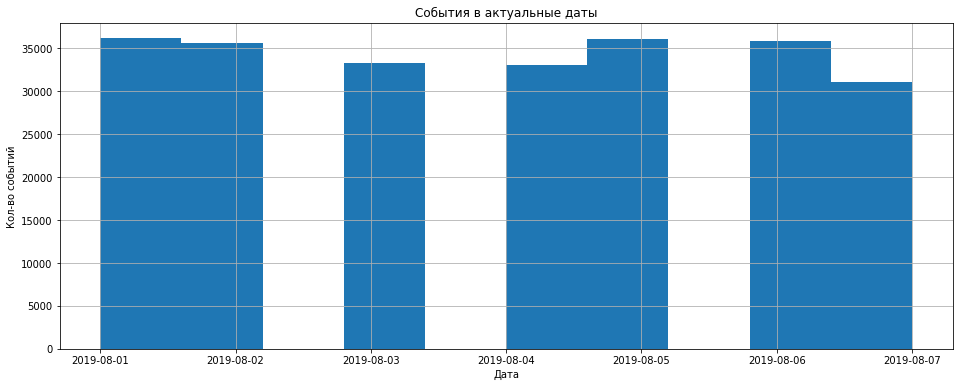

In [86]:
data_clear=data[data['date'] >= pd.to_datetime("2019-08-01").date()]
data_clear['date'].hist(figsize=(16, 6));
plt.xlabel('Дата')
plt.ylabel('Кол-во событий')
plt.title('События в актуальные даты');

In [102]:
# теперь узнаю,сколько данных было потеряно
print(
    '\n Было утеряно событий в %: ',round(abs(100*(data_clear['event'].count()/data['event'].count() - 1)),2) ,
    '\n Было потеряно пользователей в %: ',round(abs(100*(data_clear['user_id'].nunique()/data['user_id'].nunique() -1)),2) 
)

# и не потеряли ли какую-либо из групп
print('\n',data_clear['group'].unique())


 Было утеряно событий в %:  1.16 
 Было потеряно пользователей в %:  0.23

 [246 247 248]


Потеряли около 1% данных и меньше 0.25% пользователей. Все группы сохранились, можно работать дальше.